In [4]:
pip install -U scikit-learn

In [ ]:
import os
os.chdir("/content/drive/My Drive/Analytic-Steps-blogs/YouTube/Sentiment/fourth_blog/")

In [5]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import scipy


import warnings
warnings.filterwarnings("ignore")


In [6]:
from textblob import TextBlob
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

In [8]:
ls

Dataset.csv  sample_data/


In [9]:
data = pd.read_csv("Dataset.csv")

In [10]:
data.head()

,Video ID,Comment ID,comments
0,MwpMEbgC7DA,UgwUJGD9twrbc2p5HsF4AaABAg,Who else just randomly remembered this s...
1,MwpMEbgC7DA,UgwatJec2ipyRetMjPJ4AaABAg,still can't realize its going to be 9th...
2,MwpMEbgC7DA,UgwUv2-t5p8tboW69vB4AaABAg,It's October 2021 Let's See how many ...
3,MwpMEbgC7DA,UgxAIow1Xkh884IL9V94AaABAg,Timeless classic 3
4,MwpMEbgC7DA,UgydlW8DryB7MgHl_5p4AaABAg,This song will never be forgotten Will...


In [11]:
data.shape

(1067, 3)

In [12]:
data['polarity'] = data['comments'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [13]:
data.head()

,Video ID,Comment ID,comments,polarity
0,MwpMEbgC7DA,UgwUJGD9twrbc2p5HsF4AaABAg,Who else just randomly remembered this s...,-0.500000
1,MwpMEbgC7DA,UgwatJec2ipyRetMjPJ4AaABAg,still can't realize its going to be 9th...,0.600000
2,MwpMEbgC7DA,UgwUv2-t5p8tboW69vB4AaABAg,It's October 2021 Let's See how many ...,0.500000
3,MwpMEbgC7DA,UgxAIow1Xkh884IL9V94AaABAg,Timeless classic 3,0.166667
4,MwpMEbgC7DA,UgydlW8DryB7MgHl_5p4AaABAg,This song will never be forgotten Will...,0.166667


## Shuffle the dataset

In [14]:
data = data.sample(frac=1).reset_index(drop=True)

In [15]:
data['pol_cat']  = 0

Continuous to categorical

In [16]:
# data['pol_cat'][data.polarity == 0] = 0
data['pol_cat'][data.polarity > 0] = 1
data['pol_cat'][data.polarity <= 0] = -1


In [17]:
data.head()

,Video ID,Comment ID,comments,polarity,pol_cat
0,MwpMEbgC7DA,UgxRaaXSvOnxOpx2XBZ4AaABAg,why have i just realised just now tha...,0.600000,1
1,MwpMEbgC7DA,UgwJ8rCuePPDV8yKzs14AaABAg,This is my comfort song it makes me ...,0.200000,1
2,MwpMEbgC7DA,UgydlW8DryB7MgHl_5p4AaABAg,This song will never be forgotten Will...,0.166667,1
3,MwpMEbgC7DA,UgyBWzS2Kg_xBe0oGgJ4AaABAg,I came here after vampire diaries season 6,0.000000,-1
4,MwpMEbgC7DA,UgxIQvlfp3yXOEGCXn54AaABAg,I was here in 2021 and i will be here...,0.000000,-1


In [18]:
data['pol_cat'].value_counts()

-1    565
 1    502
Name: pol_cat, dtype: int64

Create separate dataframes for Negative,Positive & Neutral comments 

In [19]:
data_pos = data[data['pol_cat'] == 1]
data_pos = data_pos.reset_index(drop = True)

data_neg = data[data['pol_cat'] == -1]
data_neg = data_neg.reset_index(drop = True)

# data_neutral = data[data['pol_cat'] == 0]
# data_neutral = data_neutral.reset_index(drop = True)

In [20]:
data_pos.head()

,Video ID,Comment ID,comments,polarity,pol_cat
0,MwpMEbgC7DA,UgxRaaXSvOnxOpx2XBZ4AaABAg,why have i just realised just now tha...,0.600000,1
1,MwpMEbgC7DA,UgwJ8rCuePPDV8yKzs14AaABAg,This is my comfort song it makes me ...,0.200000,1
2,MwpMEbgC7DA,UgydlW8DryB7MgHl_5p4AaABAg,This song will never be forgotten Will...,0.166667,1
3,MwpMEbgC7DA,Ugjo13NqRq4553gCoAEC,I wanna take you somewhere so you know ...,0.356897,1
4,MwpMEbgC7DA,UgzR2lWAvrfjYlbfEoB4AaABAg,I wanna take you somewhere so you know ...,0.356897,1


In [21]:
data_pos.shape

(502, 5)

In [22]:
data_neg.head()

,Video ID,Comment ID,comments,polarity,pol_cat
0,MwpMEbgC7DA,UgyBWzS2Kg_xBe0oGgJ4AaABAg,I came here after vampire diaries season 6,0.000000,-1
1,MwpMEbgC7DA,UgxIQvlfp3yXOEGCXn54AaABAg,I was here in 2021 and i will be here...,0.000000,-1
2,MwpMEbgC7DA,UgxdTG3rJbqJRfUs1at4AaABAg,Pov you're 9 years later,0.000000,-1
3,MwpMEbgC7DA,Ugw6lEn_5ReUJX506614AaABAg,Let s see how muny people are listening...,0.000000,-1
4,MwpMEbgC7DA,UgzwkrWpL3FPed-l0qF4AaABAg,Its so hard to not cry while listening ...,-0.291667,-1


In [23]:
data_neg['comments'][40]

'Legends  watch    this  in  2030'

-1    565
 1    502
Name: pol_cat, dtype: int64

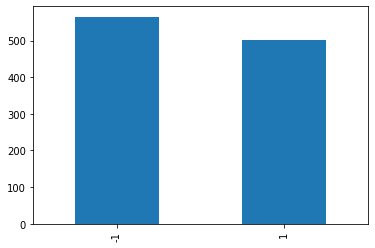

In [24]:
data.pol_cat.value_counts().plot.bar()
data.pol_cat.value_counts()

## Data Preprocessing

Lower the text in comments

In [25]:
data['comments'] = data['comments'].str.lower()

In [26]:
data['comments'].head()

0    why    have  i  just  realised  just  now  tha...
1    this  is  my  comfort  song    it  makes  me  ...
2    this  song  will  never  be  forgotten    will...
3    i  came  here  after  vampire  diaries  season  6
4    i  was  here  in  2021  and  i  will  be  here...
Name: comments, dtype: object

In [27]:
data.describe()

,polarity,pol_cat
count,1067.000000,1067.000000
mean,0.162778,-0.059044
std,0.327622,0.998723
min,-1.000000,-1.000000
25%,0.000000,-1.000000
50%,0.000000,-1.000000
75%,0.361667,1.000000
max,1.000000,1.000000


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Video ID    1067 non-null   object 
 1   Comment ID  1067 non-null   object 
 2   comments    1067 non-null   object 
 3   polarity    1067 non-null   float64
 4   pol_cat     1067 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 41.8+ KB


In [29]:
data['comments'][0]

'why    have  i  just  realised  just  now  that  he  has  a  karen  cut  lmao'

In [30]:
data['comments'][0].strip()

'why    have  i  just  realised  just  now  that  he  has  a  karen  cut  lmao'

In [31]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [33]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
from nltk.corpus import stopwords
from nltk import word_tokenize
import string
import re
import nltk

In [35]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [36]:
stop_words = set(stopwords.words('english'))

In [ ]:
data['comments'] = data['comments'].str.strip()

In [37]:
train = data.copy()

In [38]:
train['comments'] = train['comments'].str.strip()

In [39]:
train['comments'][0]

'why    have  i  just  realised  just  now  that  he  has  a  karen  cut  lmao'

In [40]:
def remove_stopwords(line):
    word_tokens = word_tokenize(line)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return " ".join(filtered_sentence)

In [41]:
data['stop_comments'] = data['comments'].apply(lambda x : remove_stopwords(x))

In [42]:
data.head()

,Video ID,Comment ID,comments,polarity,pol_cat,stop_comments
0,MwpMEbgC7DA,UgxRaaXSvOnxOpx2XBZ4AaABAg,why have i just realised just now tha...,0.600000,1,realised karen cut lmao
1,MwpMEbgC7DA,UgwJ8rCuePPDV8yKzs14AaABAg,this is my comfort song it makes me ...,0.200000,1,comfort song makes feel every emotion need fee...
2,MwpMEbgC7DA,UgydlW8DryB7MgHl_5p4AaABAg,this song will never be forgotten will...,0.166667,1,song never forgotten pass generations classic ...
3,MwpMEbgC7DA,UgyBWzS2Kg_xBe0oGgJ4AaABAg,i came here after vampire diaries season 6,0.000000,-1,came vampire diaries season 6
4,MwpMEbgC7DA,UgxIQvlfp3yXOEGCXn54AaABAg,i was here in 2021 and i will be here...,0.000000,-1,2021 2022 2023 2024 die


In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train,X_test,y_train,y_test = train_test_split(data['stop_comments'],data['pol_cat'],test_size = 0.2,random_state = 324)

In [45]:
X_train.shape

(853,)

In [46]:
X_test.shape

(214,)

In [47]:
data['pol_cat'].value_counts()

-1    565
 1    502
Name: pol_cat, dtype: int64

## Gonna Apply Logistic Regression

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

In [50]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
vect = CountVectorizer()
tf_train = vect.fit_transform(X_train)
tf_test = vect.transform(X_test)

In [57]:
tf_train

<853x2224 sparse matrix of type '<class 'numpy.int64'>'
	with 8341 stored elements in Compressed Sparse Row format>

In [51]:
tf_train.shape

(853, 2224)

### Print the Vocabulary

In [52]:
print(vect.vocabulary_)

{'way': 2135, 'song': 1824, 'years': 2209, 'old': 1425, 'im': 1067, 'hearing': 994, 'promise': 1553, 'forever': 857, 'remember': 1637, 'came': 406, 'outand': 1447, 'ago': 222, 'worry': 2187, 'one': 1432, 'listening': 1212, 'masterpiece': 1284, 'august': 285, 'september': 1728, '2021': 55, '2020': 54, 'crying': 564, 'hard': 980, 'feels': 824, 'better': 332, 'lyrics': 1262, 'wan': 2122, 'na': 1368, 'take': 1931, 'somewhere': 1822, 'know': 1160, 'care': 418, 'cold': 487, 'brought': 383, 'daffodils': 578, 'pretty': 1542, 'string': 1889, 'wo': 2174, 'flower': 852, 'like': 1204, 'last': 1169, 'spring': 1850, 'kiss': 1155, 'make': 1271, 'feel': 821, 'alright': 240, 'tired': 1993, 'share': 1737, 'nights': 1389, 'cry': 562, 'love': 1246, 'tears': 1947, 'used': 2088, 'pre': 1534, 'chorus': 459, 'another': 253, 'verse': 2100, 'somebody': 1815, 'hurts': 1051, 'fight': 829, 'hands': 970, 'broken': 381, 'many': 1278, 'times': 1992, 'll': 1221, 'use': 2087, 'voice': 2112, 'fucking': 883, 'rude': 1667

In [53]:
vocab = vect.vocabulary_

In [ ]:
# for key,value in vocab.items():
#     if(value == 162):
#         print(key)

import the logistic regression classifer and fit on the training dataset

In [58]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(tf_train,y_train)

LogisticRegression()

###  Accuracy score on training dataset

In [59]:
lr.score(tf_train,y_train)

0.9742086752637749

### Accuracy score on test dataset i.e got from the splitting

In [61]:
lr.score(tf_test,y_test)

0.8644859813084113

### Make predictions on the test dataset i.e. unseen data to the model

In [62]:
expected = y_test
predicted = lr.predict(tf_test)

### plot confusion matrix for the test dataset

In [63]:

from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [64]:
pip install mlxtend

[[ 77  23]
 [  6 108]]


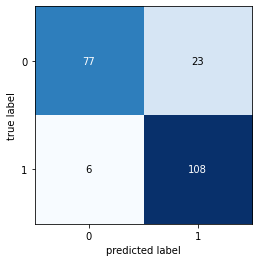

In [65]:
cf = metrics.confusion_matrix(expected,predicted,labels = [1,-1])
print(cf)
## this command is only for google collab 
## in the below figure " 1 is actually showing -1 and 0 is actually showing 1"
fig, ax = plot_confusion_matrix(conf_mat = cf)
                                
## It canbe used in any platform
# fig, ax = plot_confusion_matrix(conf_mat = cf, class_names = [1,-1])
plt.show()

In [66]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))
# print(metrics.confusion_matrix(expected,predicted))

              precision    recall  f1-score   support

          -1       0.82      0.95      0.88       114
           1       0.93      0.77      0.84       100

    accuracy                           0.86       214
   macro avg       0.88      0.86      0.86       214
weighted avg       0.87      0.86      0.86       214



### find the F1 score

In [67]:
from sklearn.metrics import f1_score
f1_score(expected, predicted, average='macro')

0.8615813538530166